In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Part B

## Question 1

In [201]:
cd = ""
filename = "quiz_3758.xlsx"


In [202]:
quiz_ans = pd.read_excel(cd + filename, engine='openpyxl')
if 'Timestamp' in quiz_ans.columns:
    print("yes")
    quiz_ans.drop(columns=['Timestamp'], inplace=True)

if len(quiz_ans.columns) > 6:
    print('You have more than six columns in your excel, not including timestamp')


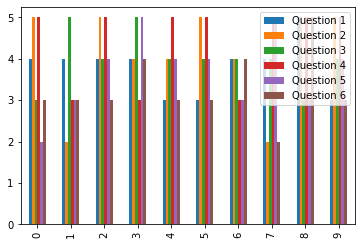

In [203]:
quiz_ans.plot.bar()
plt.show()


In [217]:
quiz_matrix = quiz_ans.to_numpy()
print('quiz matrix: \n', quiz_matrix)



quiz matrix: 
 [[4 5 3 5 2 3]
 [4 2 5 3 3 3]
 [4 5 4 5 4 3]
 [4 4 5 3 5 4]
 [3 4 4 5 4 3]
 [3 5 4 5 4 3]
 [4 4 4 3 3 4]
 [4 2 4 5 5 2]
 [5 5 3 5 3 5]
 [3 5 4 5 4 3]]


## Question 2

In [216]:
participants_count = len(quiz_matrix)
questions_count = np.size(quiz_matrix[0])
print('participants_count: \n', participants_count)
print('questions_count: \n', questions_count)


participants_count: 
 10
questions_count: 
 6


In [206]:
normelize_questions_matrix = np.zeros((participants_count, questions_count))

for question_index in range(questions_count):
    one_question = quiz_matrix[:, question_index]
    question_mean = np.mean(one_question, axis=0)
    normelize_questions_matrix[:,
                               question_index] = one_question - question_mean

print('normelize questions matrix: \n', normelize_questions_matrix)


array([[ 0.2,  0.9, -1. ,  0.6, -1.7, -0.3],
       [ 0.2, -2.1,  1. , -1.4, -0.7, -0.3],
       [ 0.2,  0.9,  0. ,  0.6,  0.3, -0.3],
       [ 0.2, -0.1,  1. , -1.4,  1.3,  0.7],
       [-0.8, -0.1,  0. ,  0.6,  0.3, -0.3],
       [-0.8,  0.9,  0. ,  0.6,  0.3, -0.3],
       [ 0.2, -0.1,  0. , -1.4, -0.7,  0.7],
       [ 0.2, -2.1,  0. ,  0.6,  1.3, -1.3],
       [ 1.2,  0.9, -1. ,  0.6, -0.7,  1.7],
       [-0.8,  0.9,  0. ,  0.6,  0.3, -0.3]])

## Question 3

In [207]:
covariance_matrix = (normelize_questions_matrix.T @ normelize_questions_matrix) / len(quiz_matrix)
print('covariance matrix: \n', covariance_matrix)


covariance matrix: 
 [[ 0.36 -0.08 -0.1  -0.12 -0.16  0.26]
 [-0.08  1.29 -0.4   0.46 -0.27  0.37]
 [-0.1  -0.4   0.4  -0.4   0.3  -0.1 ]
 [-0.12  0.46 -0.4   0.84  0.02 -0.22]
 [-0.16 -0.27  0.3   0.02  0.81 -0.21]
 [ 0.26  0.37 -0.1  -0.22 -0.21  0.61]]


## Question 4

In [208]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eigenvalues, eigenvectors
print('eigenvalues: \n', eigenvalues)
print('eigenvectors: \n', eigenvectors)


eigenvalues: 
 [1.94955586 1.17037574 0.68232442 0.40197669 0.07297539 0.0327919 ]
eigenvectors: 
 [[-0.02422039  0.35342079  0.16207262  0.63824934 -0.6415463   0.17115991]
 [-0.7487199  -0.03050599 -0.48233945 -0.26014015 -0.37159484 -0.00899646]
 [ 0.37090611  0.03617541 -0.33395772 -0.27925022 -0.14086903  0.80732117]
 [-0.39145548 -0.60582793  0.27402227  0.3496403   0.22637371  0.48078429]
 [ 0.31284246 -0.45573873 -0.65566254  0.44774518 -0.04930035 -0.24825828]
 [-0.2239481   0.54601209 -0.3529473   0.35250548  0.61385337  0.16146263]]


# Part 3

## Question 1

In [209]:
eigenvalues_sort_reverse = np.flip(np.sort(eigenvalues))

print('eigenvalues sort reverse: \n', eigenvalues_sort_reverse)


eigenvalues sort reverse: 
 [1.94955586 1.17037574 0.68232442 0.40197669 0.07297539 0.0327919 ]


In [210]:
explained_variance_lst = []
for index in range(np.size(eigenvalues_sort_reverse)):
    variance_explained = sum(
        eigenvalues_sort_reverse[:index]) / sum(eigenvalues_sort_reverse)
    explained_variance_lst.append(variance_explained)

print("explained variance list: \n", explained_variance_lst)



explained variance list: 
 [0.0, 0.4523331456800387, 0.7238820404463545, 0.8821939710290899, 0.975460024877151, 0.9923916695965822]


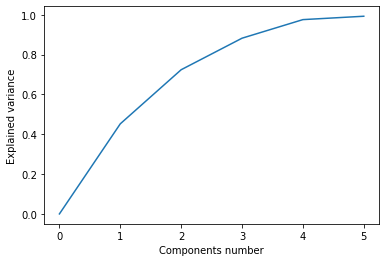

In [211]:
plt.plot(range(np.size(eigenvalues_sort_reverse)), explained_variance_lst)
plt.xlabel('Components number')
plt.ylabel('Explained variance')
plt.show()


3 vectors for 50%
4 vectors for 75%
5 vectors for 95%

המשמעות של נתונים אלו היא ש3 שאלות בלבד יכולות להסביר חצי מהשונות ו5 שאלות בשביל כמעט כל השונות.

## Question 2

In [212]:
reversed_eigenvectors = []
for single_eigenvalue in eigenvalues_sort_reverse:
    for value_index in range(len(eigenvalues)):
        if single_eigenvalue == eigenvalues[value_index]:
            reversed_eigenvectors.append(eigenvectors[value_index])

print("reversed eigenvectors: \n", reversed_eigenvectors)



reversed eigenvectors: 
 [array([-0.02422039,  0.35342079,  0.16207262,  0.63824934, -0.6415463 ,
        0.17115991]), array([-0.7487199 , -0.03050599, -0.48233945, -0.26014015, -0.37159484,
       -0.00899646]), array([ 0.37090611,  0.03617541, -0.33395772, -0.27925022, -0.14086903,
        0.80732117]), array([-0.39145548, -0.60582793,  0.27402227,  0.3496403 ,  0.22637371,
        0.48078429]), array([ 0.31284246, -0.45573873, -0.65566254,  0.44774518, -0.04930035,
       -0.24825828]), array([-0.2239481 ,  0.54601209, -0.3529473 ,  0.35250548,  0.61385337,
        0.16146263])]


In [213]:
strongest_vecotor = reversed_eigenvectors[0]
print("strongest vecotor: \n", strongest_vecotor)


strongest vecotor: 
 [-0.02422039  0.35342079  0.16207262  0.63824934 -0.6415463   0.17115991]


וקטור עצמי זה מסביר את החלק הגדול ביותר בשונות, כל נקודה בוקטור מבטאת את המשקל של כל שאלה
רכיבים אלו ניתנים להסבר ע"י מעבר על הערכים וניתן לראות כי השונות בשאלות 4 ו5 היא באמת הגבוהה ביותר וכדומה
השאלות המהוות חלק משמעותי בצירים החדשים הם ארבע וחמש, רשת תמיכה וסיפוק בעבודה, לדעתי כי השאלות האלו הן ספציפיות יותר מהשאר, ואולי זה מנגנון רפלקציה אחרת

## Question 3

In [214]:
strongest_component = normelize_questions_matrix@np.array(
    reversed_eigenvectors)[:, 0]
weakest_component = normelize_questions_matrix@np.array(reversed_eigenvectors)[
    :, -1]
print("Strongest component: \n", strongest_component)
print("Weakest component: \n", weakest_component)


Strongest component: 
 [-1.74911914  2.33460619 -0.7525281   1.23890322  0.02041218 -0.72830772
  0.24231219  2.03042214 -1.90839326 -0.72830772]
Weakest component: 
 [-0.11911514  0.31268971  0.19168947 -0.04035713  0.02952602  0.02052956
 -0.35116174 -0.19104206  0.12671174  0.02052956]


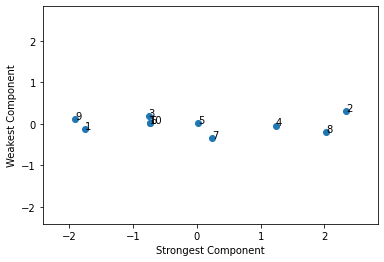

In [215]:
plt.scatter(strongest_component, weakest_component)
plt.xlim(min(min(strongest_component), min(weakest_component)) - 0.5,
         max(max(strongest_component), max(weakest_component)) + 0.5)
plt.ylim(min(min(strongest_component), min(weakest_component)) - 0.5,
         max(max(strongest_component), max(weakest_component)) + 0.5)
plt.xlabel('Strongest Component')
plt.ylabel('Weakest Component')
for index in range(len(strongest_component)):
    plt.annotate(str(index + 1),
                 (strongest_component[index], weakest_component[index]))
plt.show()


ניתן להסביר את ההבדל בין הרכיבים ע"י הפיזור של נקודות על שני הצירים
המשמעות של הרכיב הכי חלש הוא המימד שמסביר הכי פחות שונות מכולם

## Question 4

ניתן להסיק כי כי שאלות 4 ו5 מנבאות את רב השונות ושאלה 1 בקושי השפיעה
אם הייתי צריך לשאול רק שאלה אחת שתנבא בצורה הכי טובה הייתי שואל בצורה הבאה:

(Question 4 and !Question5) or (Question5 and !Question4)
וכך הייתי מוציא את הערך המיטבי לניסוי